# 80. ID番号への変換

問題51で構築した学習データ中の単語にユニークなID番号を付与したい．学習データ中で最も頻出する単語に1，2番目に頻出する単語に2，……といった方法で，学習データ中で2回以上出現する単語にID番号を付与せよ．そして，与えられた単語列に対して，ID番号の列を返す関数を実装せよ．ただし，出現頻度が2回未満の単語のID番号はすべて0とせよ．

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/NewsAggregatorDataset'

/content/drive/MyDrive/NewsAggregatorDataset


In [3]:
#50 データの入手・整形
import pandas as pd
from sklearn.model_selection import train_test_split

#データ読み込み #エラーが出るため、タブ区切り、ラベル名を指定する
df = pd.read_csv('newsCorpora.csv', sep="\t", names=["id", "title", "url", "publisher", "category", "story", "hostname", "timestamp"])

#情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する
df = df[df['publisher'].isin(["Reuters", "Huffington Post", "Businessweek", "COntactmusic.com", "Daily Mail"])]

#抽出された事例をランダムに並び替える
df = df.sample(frac = 1, random_state = 42)

#抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する
train, test = train_test_split(df, test_size=0.2, random_state = 42)
test, valid = train_test_split(test, test_size=0.5, random_state = 42)

train.to_csv("train.txt", sep="\t")
test.to_csv("test.txt", sep="\t")
valid.to_csv("valid.txt", sep="\t")

print("train:",train["category"].value_counts())
print("test:",test["category"].value_counts())
print("valid:",valid["category"].value_counts())


train: b    4494
e    2425
t    1180
m     705
Name: category, dtype: int64
test: b    557
e    275
t    168
m    101
Name: category, dtype: int64
valid: b    574
e    270
t    164
m     93
Name: category, dtype: int64


In [4]:
#51
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer()
CV.fit(train['title'])
train_X = CV.transform(train['title'])
test_X = CV.transform(test['title'])
valid_X = CV.transform(valid['title'])
print(len(CV.vocabulary_))

train_x = pd.DataFrame(data= train_X.toarray(), columns= CV.get_feature_names_out())
test_x = pd.DataFrame(data= test_X.toarray(), columns= CV.get_feature_names_out())
valid_x = pd.DataFrame(data= valid_X.toarray(), columns= CV.get_feature_names_out())

train_x.to_csv('train.feature.txt', sep='\t', index=False)
test_x.to_csv('test.feature.txt', sep='\t', index=False)
valid_x.to_csv('valid.feature.txt', sep='\t', index=False)

df1 = pd.read_csv('train.feature.txt', sep="\t")
df1.head()

11823


,00,07,08,09,10,100,1000,10000,100000,100k,...,zillow,zimmerman,zip,zmapp,zombie,zombies,zone,zooey,zuckerberg,zynga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#80
import numpy as np

df2 = pd.DataFrame(data= df1.sum(), columns=['count'])
df2['word'] = df2.index
df2 = df2.sort_values('count', ascending=False)
df2.index = np.arange(0,len(df2))
df2['id'] = df2.index+1
df2['id'].where(df2['count'] >2, 0, inplace=True)


In [6]:
def idreturn(text):
  lis= []
  for word in text.split(' '):
    number= 0

    for i in range(len(df2)):
      if word == df2['word'][i]:
        number = df2['id'][i]

    lis.append(number)

  return lis

In [7]:
print(idreturn('I have a pen'))

[0, 93, 0, 0]


# 80'

In [8]:
# データのロード
import pandas as pd
import re
import numpy as np

# ファイル読み込み
file = './newsCorpora.csv'
data = pd.read_csv(file, encoding='utf-8', header=None, sep='\t', names=['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'])
data = data.replace('"', "'")
# 特定のpublisherのみ抽出
publishers = ['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail']
data = data.loc[data['PUBLISHER'].isin(publishers), ['TITLE', 'CATEGORY']].reset_index(drop=True)

# 前処理
def preprocessing(text):
    text_clean = re.sub(r'[\"\'.,:;\(\)#\|\*\+\!\?#$%&/\]\[\{\}]', '', text)
    text_clean = re.sub('[0-9]+', '0', text_clean)
    text_clean = re.sub('\s-\s', ' ', text_clean)
    return text_clean

data['TITLE'] = data['TITLE'].apply(preprocessing)

# 学習用、検証用、評価用に分割する
from sklearn.model_selection import train_test_split

train, valid_test = train_test_split(data, test_size=0.2, shuffle=True, random_state=64, stratify=data['CATEGORY'])
valid, test = train_test_split(valid_test, test_size=0.5, shuffle=True, random_state=64, stratify=valid_test['CATEGORY'])

train = train.reset_index(drop=True)
valid = valid.reset_index(drop=True)
test = test.reset_index(drop=True)

# データ数の確認
print('学習データ')
print(train['CATEGORY'].value_counts())
print('検証データ')
print(valid['CATEGORY'].value_counts())
print('評価データ')
print(test['CATEGORY'].value_counts())

学習データ
b    4502
e    4223
t    1219
m     728
Name: CATEGORY, dtype: int64
検証データ
b    562
e    528
t    153
m     91
Name: CATEGORY, dtype: int64
評価データ
b    563
e    528
t    152
m     91
Name: CATEGORY, dtype: int64


In [9]:
# 単語の辞書を作成
from collections import Counter
words = []
for text in train['TITLE']:
    for word in text.rstrip().split():
        words.append(word)
c = Counter(words)
word2id = {}
for i, cnt in enumerate(c.most_common()):
    if cnt[1] > 1:
        word2id[cnt[0]] = i + 1
for i, cnt in enumerate(word2id.items()):
    if i >= 10:
        break
    print(cnt[0], cnt[1])

to 1
0 2
in 3
as 4
on 5
UPDATE 6
for 7
The 8
of 9
US 10


In [10]:
# 単語のID化
def tokenizer(text):
    words = text.rstrip().split()
    return [word2id.get(word, 0) for word in words]

sample = train.at[0, 'TITLE']
print(sample)
print(tokenizer(sample))

Justin Bieber Under Investigation For Attempted Robbery At Dave  Busters
[68, 76, 782, 1974, 21, 5054, 5055, 34, 1602, 0]


# 81. RNNによる予測

ID番号で表現された単語列x=(x1,x2,…,xT)
がある．ただし，T
は単語列の長さ，xt∈ℝV
は単語のID番号のone-hot表記である（V
は単語の総数である）．再帰型ニューラルネットワーク（RNN: Recurrent Neural Network）を用い，単語列x
からカテゴリy
を予測するモデルとして，次式を実装せよ


In [11]:
import torch
from torch import nn

VOCAB_SIZE = 4
EMB_SIZE = 3
emb = nn.Embedding(VOCAB_SIZE, EMB_SIZE)

words = torch.tensor([1, 3, 0, 2, 1, 2])
embed_words = emb(words)
print(embed_words)
print(words.shape, '->', embed_words.shape)

tensor([[ 0.0284,  0.7764, -0.6975],
        [ 0.8299,  0.3538,  1.1262],
        [-0.3175, -0.3705,  1.9965],
        [-0.6302,  1.3916, -1.0184],
        [ 0.0284,  0.7764, -0.6975],
        [-0.6302,  1.3916, -1.0184]], grad_fn=<EmbeddingBackward0>)
torch.Size([6]) -> torch.Size([6, 3])


In [12]:
!pip install torchinfo

In [13]:
# RNNの作成
# モデルの構築
import random
import torch
from torch import nn
import torch.utils.data as data
from torchinfo import summary

# 乱数のシードを設定
# parserなどで指定
seed = 1234

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

g = torch.Generator()
g.manual_seed(seed)

class RNN(nn.Module):
    def __init__(self, vocab_size, emb_size, padding_idx, hidden_size, output_size, num_layers=1):
        super().__init__()
        self.emb = nn.Embedding(vocab_size, emb_size, padding_idx=padding_idx)
        self.rnn = nn.RNN(emb_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, h0=None):
        x = self.emb(x)
        x, h = self.rnn(x, h0)
        x = x[:, -1, :]
        logits = self.fc(x)
        return logits

# パラメータの設定
VOCAB_SIZE = len(set(word2id.values())) + 2  # 辞書のID数 + unknown + パディングID
EMB_SIZE = 300
PADDING_IDX = len(set(word2id.values())) + 1
OUTPUT_SIZE = 4
HIDDEN_SIZE = 50
NUM_LAYERS = 1

# モデルの定義
model = RNN(VOCAB_SIZE, EMB_SIZE, PADDING_IDX, HIDDEN_SIZE, OUTPUT_SIZE, NUM_LAYERS)
print(model)

RNN(
  (emb): Embedding(9725, 300, padding_idx=9724)
  (rnn): LSTM(300, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=4, bias=True)
)


In [14]:
x = torch.tensor([tokenizer(sample)], dtype=torch.int64)
print(x)
print(x.size())
print(nn.Softmax(dim=-1)(model(x)))

tensor([[  68,   76,  782, 1974,   21, 5054, 5055,   34, 1602,    0]])
torch.Size([1, 10])
tensor([[0.2783, 0.2129, 0.2804, 0.2284]], grad_fn=<SoftmaxBackward0>)


# 82. 確率的勾配降下法による学習

確率的勾配降下法（SGD: Stochastic Gradient Descent）を用いて，問題81で構築したモデルを学習せよ．訓練データ上の損失と正解率，評価データ上の損失と正解率を表示しながらモデルを学習し，適当な基準（例えば10エポックなど）で終了させよ．

In [15]:
# ターゲットのテンソル化
category_dict = {'b': 0, 't': 1, 'e':2, 'm':3}
Y_train = torch.from_numpy(train['CATEGORY'].map(category_dict).values)
Y_valid = torch.from_numpy(valid['CATEGORY'].map(category_dict).values)
Y_test = torch.from_numpy(test['CATEGORY'].map(category_dict).values)
print(Y_train.size())
print(Y_train)

torch.Size([10672])
tensor([2, 0, 2,  ..., 0, 0, 0])


In [16]:
class NewsDataset(data.Dataset):
    """
    newsのDatasetクラス

    Attributes
    ----------------------------
    X : データフレーム
        単語ベクトルの平均をまとめたテンソル
    y : テンソル
        カテゴリをラベル化したテンソル
    phase : 'train' or 'val'
        学習か訓練かを設定する
    """
    def __init__(self, X, y, phase='train'):
        self.X = X['TITLE']
        self.y = y
        self.phase = phase

    def __len__(self):
        """全データサイズを返す"""
        return len(self.y)

    def __getitem__(self, idx):
        """idxに対応するテンソル形式のデータとラベルを取得"""
        inputs = torch.tensor(tokenizer(self.X[idx]))
        return inputs, self.y[idx]

train_dataset = NewsDataset(train, Y_train, phase='train')
valid_dataset = NewsDataset(valid, Y_valid, phase='val')
test_dataset = NewsDataset(test, Y_test, phase='val')
# 動作確認
idx = 0
print(train_dataset.__getitem__(idx)[0].size())
print(train_dataset.__getitem__(idx)[1])
print(valid_dataset.__getitem__(idx)[0].size())
print(valid_dataset.__getitem__(idx)[1])
print(test_dataset.__getitem__(idx)[0].size())
print(test_dataset.__getitem__(idx)[1])

torch.Size([10])
tensor(2)
torch.Size([11])
tensor(3)
torch.Size([13])
tensor(2)


In [17]:
# DataLoaderを作成
batch_size = 1

train_dataloader = data.DataLoader(
            train_dataset, batch_size=batch_size, shuffle=True, worker_init_fn=seed_worker, generator=g)
valid_dataloader = data.DataLoader(
            valid_dataset, batch_size=batch_size, shuffle=False, worker_init_fn=seed_worker, generator=g)
test_dataloader = data.DataLoader(
            test_dataset, batch_size=batch_size, shuffle=False, worker_init_fn=seed_worker, generator=g)

dataloaders_dict = {'train': train_dataloader,
                    'val': valid_dataloader,
                    'test': test_dataloader,
                   }

# 動作確認
batch_iter = iter(dataloaders_dict['train'])
inputs, labels = next(batch_iter)
print(inputs.size())
print(labels)

torch.Size([1, 11])
tensor([2])


In [18]:
import matplotlib.pyplot as plt
from tqdm import tqdm

# 学習用の関数を定義
def train_model(net, dataloaders_dict, criterion, optimizer, num_epochs):
    train_loss = []
    train_acc = []
    valid_loss = []
    valid_acc = []
    # epochのループ
    for epoch in range(num_epochs):
        print('Epoch {} / {}'.format(epoch + 1, num_epochs))
        print('--------------------------------------------')

        # epochごとの学習と検証のループ
        for phase in ['train', 'val']:
            if phase == 'train':
                net.train() # 訓練モード
            else:
                net.eval() # 検証モード

            epoch_loss = 0.0 # epochの損失和
            epoch_corrects = 0 # epochの正解数

            # データローダーからミニバッチを取り出すループ
            for inputs, labels in tqdm(dataloaders_dict[phase]):
                optimizer.zero_grad() # optimizerを初期化

                # 順伝播計算(forward)
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = net(inputs)
                    loss = criterion(outputs, labels) # 損失を計算
                    _, preds = torch.max(outputs, 1) # ラベルを予想

                    # 訓練時は逆伝播
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                    # イテレーション結果の計算
                    # lossの合計を更新
                    epoch_loss += loss.item() * inputs.size(0)
                    # 正解数の合計を更新
                    epoch_corrects += torch.sum(preds == labels.data)

            # epochごとのlossと正解率の表示
            epoch_loss = epoch_loss / len(dataloaders_dict[phase].dataset)
            epoch_acc = epoch_corrects.double() / len(dataloaders_dict[phase].dataset)
            if phase == 'train':
                train_loss.append(epoch_loss)
                train_acc.append(epoch_acc)
            else:
                valid_loss.append(epoch_loss)
                valid_acc.append(epoch_acc)

            print('{} Loss: {:.4f}, Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
    return train_loss, train_acc, valid_loss, valid_acc

# 学習を実行する

# モデルの定義
net = RNN(VOCAB_SIZE, EMB_SIZE, PADDING_IDX, HIDDEN_SIZE, OUTPUT_SIZE, NUM_LAYERS)
net.train()

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# 最適化手法の定義
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

num_epochs = 5
train_loss, train_acc, valid_loss, valid_acc = train_model(net,
            dataloaders_dict, criterion, optimizer, num_epochs=num_epochs)

Epoch 1 / 5
--------------------------------------------


100%|██████████| 10672/10672 [04:46<00:00, 37.30it/s]


train Loss: 0.9959, Acc: 0.6041


100%|██████████| 1334/1334 [00:00<00:00, 1566.76it/s]


val Loss: 0.7686, Acc: 0.7391
Epoch 2 / 5
--------------------------------------------


100%|██████████| 10672/10672 [05:53<00:00, 30.15it/s]


train Loss: 0.6217, Acc: 0.7737


100%|██████████| 1334/1334 [00:00<00:00, 1588.29it/s]


val Loss: 0.6238, Acc: 0.7729
Epoch 3 / 5
--------------------------------------------


100%|██████████| 10672/10672 [05:49<00:00, 30.52it/s]


train Loss: 0.3893, Acc: 0.8622


100%|██████████| 1334/1334 [00:00<00:00, 1566.30it/s]


val Loss: 0.5844, Acc: 0.8013
Epoch 4 / 5
--------------------------------------------


100%|██████████| 10672/10672 [06:14<00:00, 28.46it/s]


train Loss: 0.2284, Acc: 0.9230


100%|██████████| 1334/1334 [00:00<00:00, 1612.55it/s]


val Loss: 0.5825, Acc: 0.8096
Epoch 5 / 5
--------------------------------------------


100%|██████████| 10672/10672 [06:20<00:00, 28.01it/s]


train Loss: 0.1208, Acc: 0.9635


100%|██████████| 1334/1334 [00:00<00:00, 1608.68it/s]

val Loss: 0.6255, Acc: 0.8186


# 83. ミニバッチ化・GPU上での学習

問題82のコードを改変し，B
事例ごとに損失・勾配を計算して学習を行えるようにせよ（B
の値は適当に選べ）．また，GPU上で学習を実行せよ

In [19]:
#TITLEと正解ラベルを含むbatchから、ID列(x)とラベル(labels)を返す関数を作る。→DataLoderの引数collate_fnに指定し、それを出力とする。
#バッチ内でタイトルの単語数が異なるため、最長単語数で揃える。
#padding_valueという引数は、パディングされた後の値。
#padding_value = PADDING_IDXとすることで、ID=9724(今回の場合)が割り当てられる。(PADDING_IDX=9724は、学習データで0以外のIDが割り当てられた単語数+1)
#https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pad_sequence.html
def collate_fn(batch):
    sequences = [x[0] for x in batch]
    labels = torch.LongTensor([x[1] for x in batch])
    x = torch.nn.utils.rnn.pad_sequence(sequences, batch_first=True, padding_value=PADDING_IDX)
    return x, labels

# DataLoaderを作成
batch_size = 64

train_dataloader = data.DataLoader(
            train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn, worker_init_fn=seed_worker, generator=g)
valid_dataloader = data.DataLoader(
            valid_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn, worker_init_fn=seed_worker, generator=g)
test_dataloader = data.DataLoader(
            test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn, worker_init_fn=seed_worker, generator=g)

dataloaders_dict = {'train': train_dataloader,
                    'val': valid_dataloader,
                    'test': test_dataloader,
                   }

# 動作確認
#DataLoaderからiter & nextで中身を取り出してみる
#batch_size=64分の結果が出てくる
batch_iter = iter(dataloaders_dict['train'])
inputs, labels = next(batch_iter)
print(inputs)
print(labels)

tensor([[2788, 2441, 2442, 5578,   14, 2156,   63,    0, 1208, 3704,   14, 2748,
         9724, 9724, 9724],
        [9484,    0, 4894, 1067, 6995,   35,  390,  724,   11,  169,   19, 5015,
         3190, 9724, 9724],
        [ 543,  126,    8,  872, 1237, 3605,   12, 9388, 9724, 9724, 9724, 9724,
         9724, 9724, 9724],
        [5795,   51, 1378, 1399, 5777,  329, 1567,   80, 4692, 9724, 9724, 9724,
         9724, 9724, 9724],
        [  46,   47,  111,  718, 7547,   93,  145, 2468,   40,   17, 5690,  624,
           66, 1143, 7548],
        [5306,  128,  409,  152,   23, 1687,  400,    3, 1841,    2, 2683, 9724,
         9724, 9724, 9724],
        [2019, 1143, 5157,    4, 1651,  293,  493,    0, 6726, 9724, 9724, 9724,
         9724, 9724, 9724],
        [   6, 2650,  646,  939,  270, 6594,    0, 4484,    3,    2,  201,   90,
         9724, 9724, 9724],
        [ 456, 5260,   22,  702, 4314, 2889,  358,  769, 1145, 9724, 9724, 9724,
         9724, 9724, 9724],
        [   6,    0

In [20]:
# 学習用の関数を定義
#学習を実行し、訓練データと検証データ(or評価データ)の誤差と正解率を返す関数を作成
def train_model(net, dataloaders_dict, criterion, optimizer, num_epochs):

    # 初期設定
    # デバイスを指定
    # GPUを指定
    device = torch.device('cuda')

    # ネットワークをgpuへ
    net.to(device)

    #各試行の結果を保存するリストを作成(plt用)
    train_loss = []
    train_acc = []
    valid_loss = []
    valid_acc = []

    # epochのループ
    #epoch=10指定
    for epoch in range(num_epochs):
        # epochごとの学習と検証のループ
        for phase in ['train', 'val']:
            if phase == 'train':
                net.train() # 訓練モード
            else:
                net.eval() # 検証モード

            epoch_loss = 0.0 # epochの損失和
            epoch_corrects = 0 # epochの正解数

            # データローダーからミニバッチを取り出すループ
            for inputs, labels in dataloaders_dict[phase]:
                # GPUにおくる
                inputs = inputs.to(device)
                labels = labels.to(device)
                optimizer.zero_grad() # optimizerを初期化

                # 順伝播計算(forward)
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = net(inputs)
                    loss = criterion(outputs, labels) # 損失を計算
                    _, preds = torch.max(outputs, 1) # ラベルを予想

                    # 訓練時は逆伝播
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                    # イテレーション結果の計算
                    # lossの合計を更新
                    epoch_loss += loss.item() * inputs.size(0)
                    # 正解数の合計を更新
                    epoch_corrects += torch.sum(preds == labels.data)

            # epochごとのlossと正解率の表示
            epoch_loss = epoch_loss / len(dataloaders_dict[phase].dataset)
            epoch_acc = epoch_corrects.double() / len(dataloaders_dict[phase].dataset)
            if phase == 'train':
                train_loss.append(epoch_loss)
                train_acc.append(epoch_acc.cpu())
            else:
                valid_loss.append(epoch_loss)
                valid_acc.append(epoch_acc.cpu())

        print('Epoch {} / {} (train) Loss: {:.4f}, Acc: {:.4f}, (val) Loss: {:.4f}, Acc: {:.4f}'.format(epoch + 1, num_epochs, train_loss[-1], train_acc[-1], valid_loss[-1], valid_acc[-1]))
    return train_loss, train_acc, valid_loss, valid_acc

# モデルの定義
net = RNN(VOCAB_SIZE, EMB_SIZE, PADDING_IDX, HIDDEN_SIZE, OUTPUT_SIZE, NUM_LAYERS)
net.train()

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# 最適化手法の定義
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

num_epochs = 10
train_loss, train_acc, valid_loss, valid_acc = train_model(net,
            dataloaders_dict, criterion, optimizer, num_epochs=num_epochs)

Tesla T4
使用デバイス: cuda:0
Epoch 1 / 10 (train) Loss: 1.1923, Acc: 0.4275, (val) Loss: 1.1561, Acc: 0.4445
Epoch 2 / 10 (train) Loss: 1.1544, Acc: 0.4635, (val) Loss: 1.1455, Acc: 0.4903
Epoch 3 / 10 (train) Loss: 1.1443, Acc: 0.4919, (val) Loss: 1.1301, Acc: 0.5015
Epoch 4 / 10 (train) Loss: 1.1253, Acc: 0.5191, (val) Loss: 1.0997, Acc: 0.5412
Epoch 5 / 10 (train) Loss: 1.0558, Acc: 0.5856, (val) Loss: 0.9747, Acc: 0.6484
Epoch 6 / 10 (train) Loss: 0.9136, Acc: 0.6797, (val) Loss: 0.8527, Acc: 0.7046
Epoch 7 / 10 (train) Loss: 0.7973, Acc: 0.7303, (val) Loss: 0.8038, Acc: 0.7264
Epoch 8 / 10 (train) Loss: 0.7125, Acc: 0.7605, (val) Loss: 0.7462, Acc: 0.7421
Epoch 9 / 10 (train) Loss: 0.6280, Acc: 0.7821, (val) Loss: 0.7554, Acc: 0.7459
Epoch 10 / 10 (train) Loss: 0.5662, Acc: 0.8002, (val) Loss: 0.7076, Acc: 0.7519


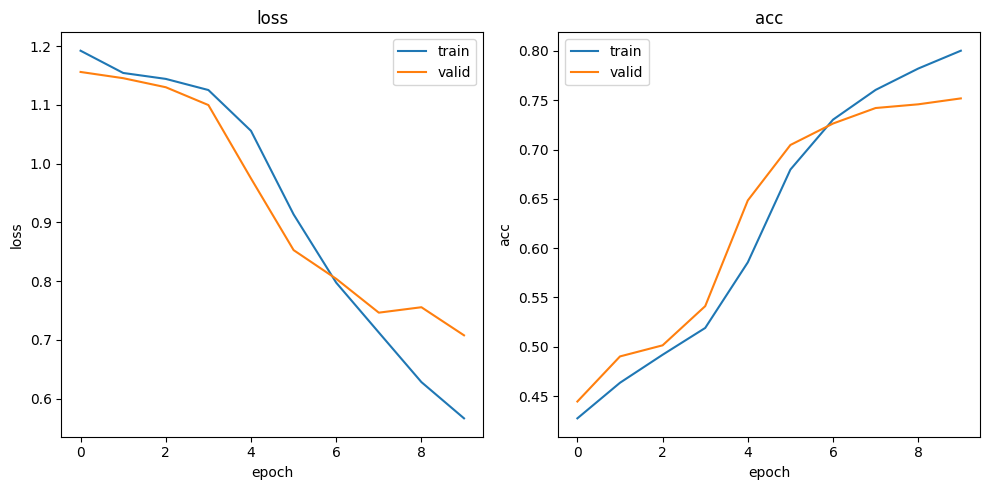

In [21]:
#図示
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(10, 5))
epochs = np.arange(num_epochs)
ax[0].plot(epochs, train_loss, label='train')
ax[0].plot(epochs, valid_loss, label='valid')
ax[0].set_title('loss')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[1].plot(epochs, train_acc, label='train')
ax[1].plot(epochs, valid_acc, label='valid')
ax[1].set_title('acc')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('acc')
ax[0].legend(loc='best')
ax[1].legend(loc='best')
plt.tight_layout()
plt.savefig('fig83.png')
plt.show()

# 84. 単語ベクトルの導入

事前学習済みの単語ベクトル（例えば，Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル）で単語埋め込みemb(x)
を初期化し，学習せよ．

# 85. 双方向RNN・多層化

順方向と逆方向のRNNの両方を用いて入力テキストをエンコードし，モデルを学習せよ．

ただし，h→t∈ℝdh,h⃖ t∈ℝdh
はそれぞれ，順方向および逆方向のRNNで求めた時刻t
の隠れ状態ベクトル，RNN←−−−(x,h)
は入力x
と次時刻の隠れ状態h
から前状態を計算するRNNユニット，W(yh)∈ℝL×2dh
は隠れ状態ベクトルからカテゴリを予測するための行列，b(y)∈ℝL
はバイアス項である．また，[a;b]
はベクトルa
とb
の連結を表す。

さらに，双方向RNNを多層化して実験せよ．